In [1]:
%matplotlib inline
import pandas as pd
import random
import seaborn as sns

## Excercise 1
### We want to make categories for the apartments: Really cheap (cheaper than one standard deviation of the price distribution ─we assume it Normal─ to the lower side), Cheap (between the really cheap ones and the average price), Expensive (between the average and one standard deviation to higher side), and Really expensive (more than one standard deviation to the higher side). How many apartments have each category?


In [2]:
df = pd.read_csv("../data/airbnb.csv", sep=",", header=0)

In [8]:
def c_price(price):
    m = df.price.mean()
    s = df.price.std()
    if price < m-s: return 1
    elif price < m : return 2
    elif price < m+s: return 3
    else: return 4

df["c_price"] = df.price.apply(c_price)

In [9]:
df.groupby(['c_price']).id.count()

c_price
2    16747
3     3307
4      374
Name: id, dtype: int64

## Excercise 2

### We want to know what feature defines better the price between the following features: neighbourhood_group, neighbourhood, latitude, longitude, room_type, minimum_nights, number_of_reviews, reviews_per_month, availability_365. Make a Decision Tree Classifier, plot the resulting decision tree and draw your conclusions.



In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

print (df.columns)

df["c_room_type"] = pd.factorize(df["room_type"])[0]

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'c_price'],
      dtype='object')


In [11]:
df.dropna(inplace=True)

training_features = df[['latitude', 'longitude', 'c_room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

training_labels = df[["c_price"]]

[Text(587.8928571428571, 391.392, 'X[2] <= 0.5\ngini = 0.298\nsamples = 16132\nvalue = [13250, 2669, 213]'),
 Text(318.85714285714283, 304.416, 'X[3] <= 16.5\ngini = 0.465\nsamples = 7200\nvalue = [4733, 2307, 160]'),
 Text(159.42857142857142, 217.44, 'X[0] <= 41.382\ngini = 0.505\nsamples = 5702\nvalue = [3344, 2213, 145]'),
 Text(79.71428571428571, 130.464, 'X[6] <= 94.5\ngini = 0.441\nsamples = 1629\nvalue = [1116, 487, 26]'),
 Text(39.857142857142854, 43.488, '\n  (...)  \n'),
 Text(119.57142857142856, 43.488, '\n  (...)  \n'),
 Text(239.1428571428571, 130.464, 'X[0] <= 41.399\ngini = 0.52\nsamples = 4073\nvalue = [2228, 1726, 119]'),
 Text(199.28571428571428, 43.488, '\n  (...)  \n'),
 Text(279.0, 43.488, '\n  (...)  \n'),
 Text(478.2857142857142, 217.44, 'X[0] <= 41.39\ngini = 0.136\nsamples = 1498\nvalue = [1389, 94, 15]'),
 Text(398.57142857142856, 130.464, 'X[5] <= 2.69\ngini = 0.087\nsamples = 927\nvalue = [885, 39, 3]'),
 Text(358.71428571428567, 43.488, '\n  (...)  \n'),
 T

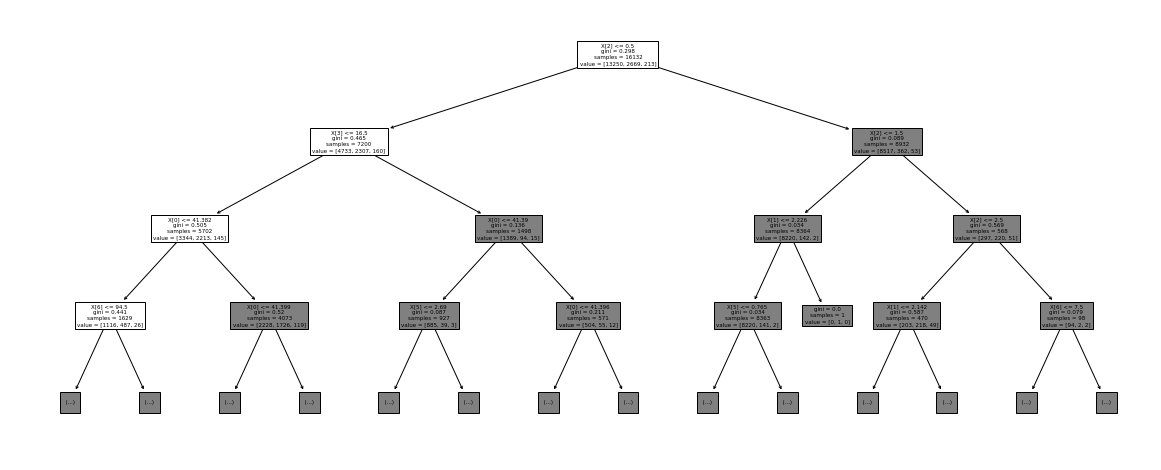

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(20,8)

dtc = DecisionTreeClassifier()
tree.plot_tree(dtc.fit(training_features, training_labels), max_depth=3)

In [15]:
print(dict(zip(['latitude', 'longitude', 'c_room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], dtc.feature_importances_)))

{'c_room_type': 0.18561271462849285, 'reviews_per_month': 0.10431076199767657, 'minimum_nights': 0.0946863442443473, 'number_of_reviews': 0.07587569740368084, 'calculated_host_listings_count': 0.1440397757551991, 'latitude': 0.14626775496963665, 'longitude': 0.14686528221084905, 'availability_365': 0.10234166879011758}


## Excercice 3
### Try two Random Forests Classification: one classifying the apartments with the previous categories as classes of apartments, and a second one where the numerical price is the classifier feature. Measure the out-of-bag accuracy (you will have to set the oob_score=True to be able to get within the variable oob_score_ the score otherwise is not computed). Which one works better?

In [19]:
from sklearn.ensemble import RandomForestClassifier

training_features = df[['latitude', 'longitude', 'c_room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

training_labels = df[["c_price"]]

rfc = RandomForestClassifier(oob_score=True)
rfc.fit(training_features, training_labels)
rfc.oob_score_

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.8894743367220431

In [20]:
training_labels = df[["price"]]

rfc = RandomForestClassifier(oob_score=True)
rfc.fit(training_features, training_labels)
rfc.oob_score_

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.15304983882965534

In [21]:
rfc = None